# Reading Matroos observations

This notebook introduces how to use the `hydropandas` package to read, process and visualise data obtained using the Matroos API.

In [1]:
import contextily as ctx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import hydropandas as hpd
from hydropandas.io.matroos import get_loc_source_units, select_by_params

# enabling debug logging so we can see what happens in the background
hpd.util.get_color_logger("INFO");

In [2]:
# get data from a certain location and grootheid
tmin = pd.Timestamp("2020-1-1")
tmax = pd.Timestamp("2020-1-3")
o1 = hpd.WaterlvlObs.from_matroos(
    location="schoonhoven", source="observed", unit="waterlevel", tmin=tmin, tmax=tmax
)
o1

,schoonhoven_observed_waterlevel
x,118175.351641
y,439646.935095
location,schoonhoven
filename,
source,Matroos
unit,
metadata_available,NaN
,waterlevel
datetime,
2025-09-22 16:50:00,0.97


In [3]:
extent = [100_500, 120_000, 430_000, 457_000]  # Schoonhoven
oc = hpd.read_matroos(
    extent=extent, units="waterlevel", sources="observed", keep_all_obs=False
)
oc

INFO:hydropandas.io.matroos.get_obs_list_from_extent:downloading 4 observations from 4 locations


location:   0%|          | 0/4 [00:00<?, ?it/s]

INFO:hydropandas.io.matroos.get_obs_list_from_extent:no measurements found for location='gouda', source='observed', unit='waterlevel', between tmin='202509221642', tmax=Timestamp('2025-10-02 16:42:31.121785') not adding to obs_list


location: 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]


,x,y,location,filename,source,unit,metadata_available,obs
name,,,,,,,,
gouda_brug_observed_waterlevel,109219.996474,446687.818137,gouda brug,,Matroos,,NaN,WaterlvlObs gouda_brug_observed_waterlevel ---...
krimpen_ad_lek_observed_waterlevel,102823.508782,433956.075932,krimpen a/d lek,,Matroos,,NaN,WaterlvlObs krimpen_ad_lek_observed_waterlevel...
schoonhoven_observed_waterlevel,118175.351641,439646.935095,schoonhoven,,Matroos,,NaN,WaterlvlObs schoonhoven_observed_waterlevel --...


In [4]:
oc.plots.interactive_map()

## Find selection criteria

You may not know which location, unit and source keywords you have to use. The code below will give you some guidance on how to find them.

In [5]:
# find all units and sources for schoonhoven
selected = select_by_params(
    locations="schoonhoven", astype="dataframe", keep_coords=False
)
print("All units and sources available for Schoonhoven:")
display(selected)

# find all sources for multiple locations and unit waterlevel
selected = select_by_params(
    locations=["schoonhoven", "Nieuwpoort"],
    units="waterlevel",
    astype="dataframe",
    keep_coords=False,
)
print("units and source for Schoonhoven and Nieuwpoort:")
display(selected)

# find all locations for observed waterlevels
selected = select_by_params(
    units="waterlevel", sources="observed", astype="dataframe", keep_coords=False
)
print("locations for observed waterlevels:")
display(selected)

All units and sources available for Schoonhoven:


,area_of_flow,discharge,water_velocity,waterlevel,waterlevel_max,waterlevel_min
schoonhoven,"[fews_rmm_sobek3_lph2012_ha, fews_rmm_sobek3_l...","[fews_rmm_sobek3_lph2012, fews_rmm_sobek3_lph2...","[fews_rmm_sobek3_lph2012, fews_rmm_sobek3_lph2...","[fews_rmm_sobek3_lph2012, fews_rmm_sobek3_lph2...","[fews_rmm_sobek3_lph2012, fews_rmm_sobek3_lph2...","[fews_rmm_sobek3_lph2012, fews_rmm_sobek3_lph2..."


units and source for Schoonhoven and Nieuwpoort:


,waterlevel
schoonhoven,"[fews_rmm_sobek3_lph2012, fews_rmm_sobek3_lph2..."
Nieuwpoort,"[dcsm6_hirlam, dcsm6_hirlam_kf, dcsm6zuno4_hir..."


locations for observed waterlevels:


,waterlevel
A121,{observed}
aalesund,{observed}
aarhus,{observed}
Aberdeen,{observed}
almen,{observed}
...,...
wuerzburg,{observed}
zaltbommel,{observed}
zeebrugge,{observed}
zutphen,{observed}


In [6]:
params_dic = get_loc_source_units()

# print all locations
all_locations = list(params_dic.keys())
print("all locations:")
print(all_locations, "\n")

# print all units
all_units = np.unique(
    [unit for loc in params_dic.values() for unit in loc["units"].keys()]
)
print("all units:")
print(all_units, "\n")

# print all sources
all_sources = np.unique(
    [s for loc in params_dic.values() for unit in loc["units"].values() for s in unit]
)
print("all units:")
print(all_units, "\n")

all locations:
['A121', 'A122', 'aalesund', 'aarhus', 'Aberdeen', 'Aetran', 'alblasserdam', 'Almeerderstrand', 'almen', 'Almere Haven', 'altenahr', 'amay', 'amelander zeegat, boei 1-1', 'amelander zeegat, boei 1-2', 'amelander zeegat, boei 2-1', 'amelander zeegat, boei 2-2', 'amelander zeegat, boei 3-1', 'amelander zeegat, boei 3-2', 'amelander zeegat, boei 4-1', 'amelander zeegat, boei 4-2', 'amelander zeegat, boei 5-1', 'amelander zeegat, boei 5-2', 'amelander zeegat, boei 6-1', 'amelander zeegat, boei 6-2', 'amerongen beneden', 'amerongen boven', 'Amsterdam IJ-eiland', 'anasuria', 'andernach', 'angleur', 'antifer (Fr)', 'appelzak', 'Aranmore Island', 'Arkersluis (WSVV)', 'arnhem', 'Aukfield platform', 'avonmouth', 'AWG', 'baalhoek', 'ballycotton', 'ballyglass', 'balmoral', 'bangor', 'Barmouth', 'barseback', 'bath', 'bathse spuikanaal zuid', 'beerkanaal', 'Bekaaide Maatkade', 'belfeld beneden', 'belfeld boven', 'beneluxhaven', 'bergen (N)', 'bergse diepsluis west', 'berkhout', 'BG2',

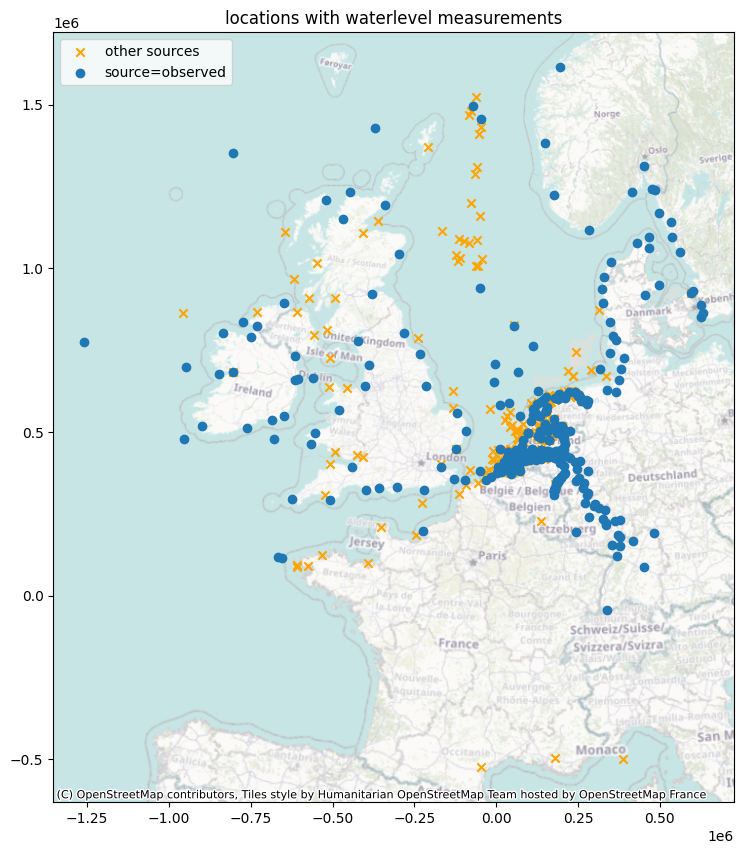

In [7]:
# plot all locations with waterlevel measurements
units = "waterlevel"
sources = "observed"

# get all locations with waterlevel measurements
selected = select_by_params(units=units, sources=sources, astype="geodataframe")
selected2 = select_by_params(units=units, sources=None, astype="geodataframe")
selected_other_sources = selected2.loc[~selected2.index.isin(selected.index)]

# plot locations
f, ax = plt.subplots(figsize=(10, 10))
selected_other_sources.plot(ax=ax, color="orange", marker="x", label="other sources")
selected.plot(ax=ax, label=f"source={sources}")
ax.set_title(f"locations with {units} measurements")
ax.legend()
ctx.add_basemap(ax=ax, crs=28992, alpha=0.5)

##